## Estimates of Location

This sections is about the mean and median

In [2]:
import pandas as pd
state = pd.read_csv("state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
print(state['Population'].mean())
print(state['Population'].median())

6162876.3
4436369.5


In [4]:
from scipy.stats import trim_mean
print(trim_mean(state['Population'],0.1))

4783697.125


In [5]:
import numpy as np

In [6]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

## Estimates of Variability

It is about dispersion, how tighly clustered or spread out is the data

In [7]:
print("std deviation = " + str(state['Population'].std()))
print("Q3-Q1 = " + str(state['Population'].quantile(0.75)-state['Population'].quantile(0.25)))

std deviation = 6848235.347401142
Q3-Q1 = 4847308.0


In [8]:
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))
print(state["Murder.Rate"].mean())

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
4.066


## Exploratory Data Analysis

Use of graphs to get an idea of the data distribution

Text(0, 0.5, 'Population (Millions)')

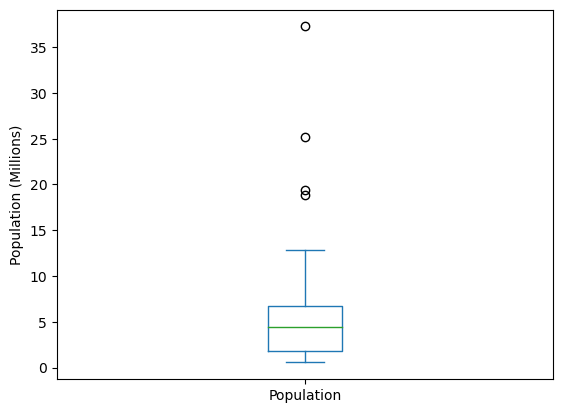

In [9]:
# a boxplot to see population distribution

box = (state["Population"]/1_000_000).plot.box()
box.set_ylabel("Population (Millions)")

In [10]:
# frequency tables histograms, but first segment the population using cut in 10 bins

binned_population = pd.cut(state["Population"],10)
binned_population.value_counts() # this show the amount of population in each bin

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0, 0.5, 'Population (Millions)')

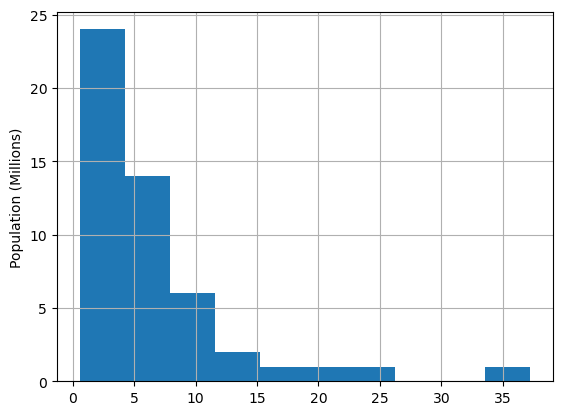

In [11]:
hist_data = (state["Population"]/1_000_000).hist(bins=10) # draws a histogram with 10 bins, with the values obtained from the population
hist_data.set_ylabel("Population (Millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

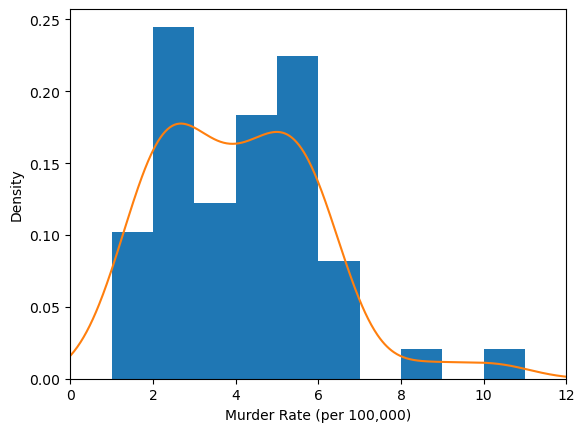

In [12]:
# creating a density plot

ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")

## Exploring Binary and Categorial Data

We use mode, expected value, bar charts and pie charts

In [13]:
dfw_data = pd.read_csv("dfw_airline.csv")
dfw_data.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [14]:
dfw_data.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


Text(0, 0.5, 'Count')

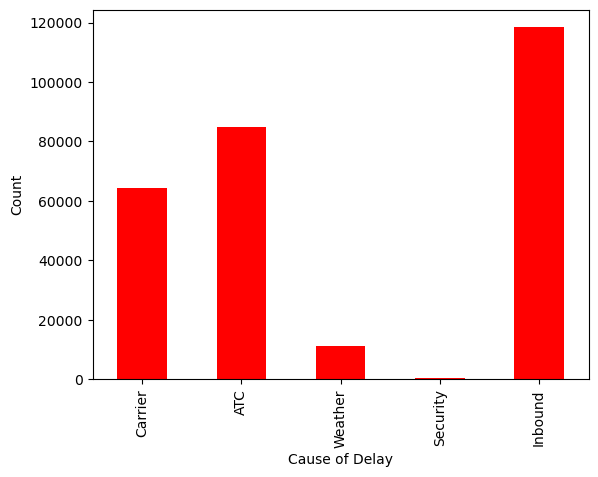

In [19]:
ax = dfw_data.transpose().plot.bar(
    legend=False,
    color="red"
)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

## Correlation

Ffrom -1 to 1, it can be represented as a number, a scatterplot or a correlation matrix like the following

In [24]:
sp500 = pd.read_csv("sp500_data.csv.gz", compression="gzip")
sp500_sectors = pd.read_csv("sp500_sectors.csv")
sp500_sectors.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [27]:
sp500_heatmap = sp500.loc[sp500.index>'2012-07-01',
                          sp500_sectors[sp500_sectors['sector']=='etf']['symbol']]
import seaborn as sns
sns.heatmap(sp500_heatmap.corr(),vmin=-1,vmax=1,cmap=sns.divering_palette(20,220,as_cmap=True))

TypeError: Invalid comparison between dtype=int64 and str